# IMDb EDA

*Analysis of IMDb dataset on factors such as ratings, revenue, runtime etc.*

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [166]:
imdb=pd.read_csv(r'C:\Users\Acer\Downloads\Study\Data Sets\IMDB-Movie.csv')
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [167]:
imdb.describe()
imdb.dtypes
imdb.info()
imdb.columns
imdb.shape
print("Number of rows -",imdb.shape[0])
print("Number of columns -",imdb.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.3+ KB
Number of rows - 1000
Number of columns - 12


In [168]:
imdb.isnull().sum()
# or
imdb.isnull().values.any()

True

<AxesSubplot:>

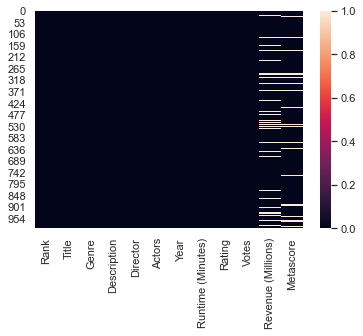

In [169]:
sns.heatmap(imdb.isnull())

In [170]:
# Null values as a percentage of entire data
missing_perc = imdb.isnull().sum() * 100 / len(imdb)
missing_perc

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [171]:
# drop missing values
imdb.dropna(axis=0, inplace = True) 
# to drop rows with missing values (axis = 0) & to drop columns with missing values (axis = 1)

In [172]:
# Check for duplicates
dup_data = imdb.duplicated().any()
print("Are there any duplicate data?", dup_data)

Are there any duplicate data? False


In [173]:
# imdb=imdb.drop_duplicates()
# imdb

In [174]:
imdb.describe(include='all')
# By default describe() dislays statistics only for numerical data. 
# To view statistics inclusive of categorical data apply (include='all').

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A suburban couple becomes embroiled in an inte...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000


In [175]:
# Movies having runtime >= 180 mins
imdb[imdb['Runtime (Minutes)'] >=180]['Title'] 

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

#### Most number of votes by year

In [176]:
imdb.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

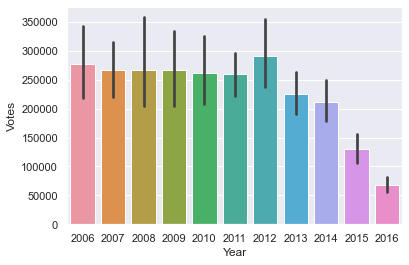

In [177]:
# confirming the above using a plot
sns.barplot(x='Year',y='Votes', data=imdb)
plt.title=('Votes by Year')
plt.show()

#### Annual revenue (highest to lowest)

In [178]:
imdb.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

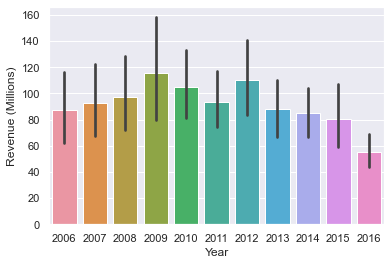

In [179]:
# confirming the above using a plot
sns.barplot(x='Year',y='Revenue (Millions)', data=imdb)
plt.title=('Revenue (Millions) by Year')
plt.show()

#### Directors with highest rating

In [180]:
top10_length = imdb.nlargest(10,'Rating')[['Rating','Title','Director']]\
.set_index('Rating') 
top10_length

,Title,Director
Rating,,
9.0,The Dark Knight,Christopher Nolan
8.8,Inception,Christopher Nolan
8.6,Interstellar,Christopher Nolan
8.6,Kimi no na wa,Makoto Shinkai
8.6,The Intouchables,Olivier Nakache
8.5,The Prestige,Christopher Nolan
8.5,The Departed,Martin Scorsese
8.5,The Dark Knight Rises,Christopher Nolan
8.5,Whiplash,Damien Chazelle


In [181]:
# Average of highest directors ratings
imdb.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

#### Top 10 movies by duration i.e. Runtime (Minutes)

In [182]:
top10_length = imdb.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')
top10_length

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


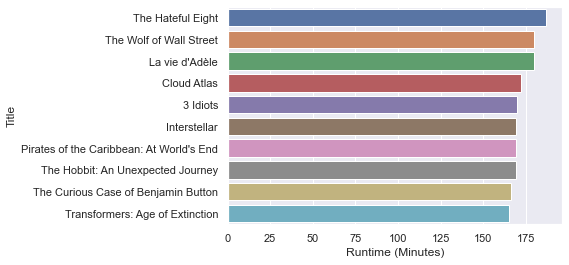

In [183]:
# plot of the above
sns.barplot(x='Runtime (Minutes)', y=top10_length.index, data=top10_length)
plt.show()

#### No. of movies by year

In [184]:
imdb['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

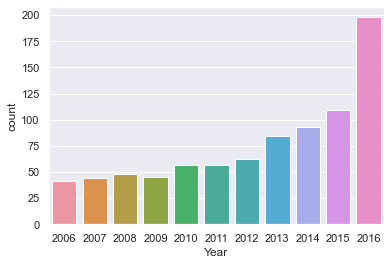

In [185]:
# plot of the above
sns.countplot(x='Year', data=imdb)

#### Highest grossing movie

In [186]:
imdb[imdb['Revenue (Millions)'].max() == imdb['Revenue (Millions)']]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [187]:
imdb.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

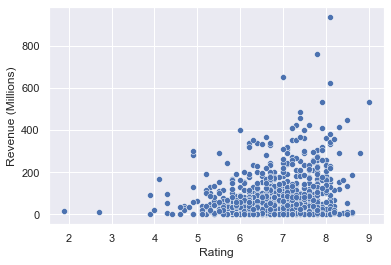

In [188]:
sns.scatterplot(x='Rating',y='Revenue (Millions)', data=imdb)

In [189]:
# rating values
imdb.Rating.unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.5, 7.8, 7.9, 7.7, 6.4,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 5.9, 6.3, 5.6, 8.6, 7.6, 6.9, 5.8,
       9. , 7.4, 4.1, 8.5, 6.8, 8.8, 5.4, 6. , 5.7, 8.4, 4.7, 5.2, 5.5,
       3.9, 4.9, 5.1, 4.3, 5. , 4.6, 4. , 1.9, 2.7, 4.4, 4.8])

#### Categorising movies as 'Excellent', 'Good' or 'Bad' as per ratings

In [190]:
def rating(rating):
    if rating >= 7.0:
        return "Excellent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [191]:
imdb['Grade Ratings']=imdb['Rating'].apply(rating)

In [192]:
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Grade Ratings
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [193]:
# Count no. of Action movies
len(imdb[imdb['Genre'].str.contains('Action')])

277

In [194]:
# Movie genres
imdb.Genre.nunique()

189

In [195]:
imdb['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Comedy',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Crime,Drama,Mystery',
       'Drama,Romance,Thriller', 'Drama,History,Thriller',
       'Action,Drama,Thriller', 'Action,Drama,Romance', 'Drama,Fantasy',
       'Action,Sc

#### *Duplication is observed as a single movie can be categorised by many genres. To distinguish particular genres, a function is created. It is as follows...*

In [196]:
# To find unique values from 'Genre'
imdb['Genre']

list1=[]
for value in imdb['Genre']:
    list1.append(value.split(','))
list1

# convert the above 2D list to 1D list
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)
one_d

# lastly find unique 'Genre'
unq_list=[]
for item in one_d:
    if item not in unq_list:
        unq_list.append(item)
unq_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [197]:
# Group films by 'Genre' by importing collections and applying 'counter' on the above function
from collections import Counter
Counter(one_d)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})

<AxesSubplot:xlabel='count'>

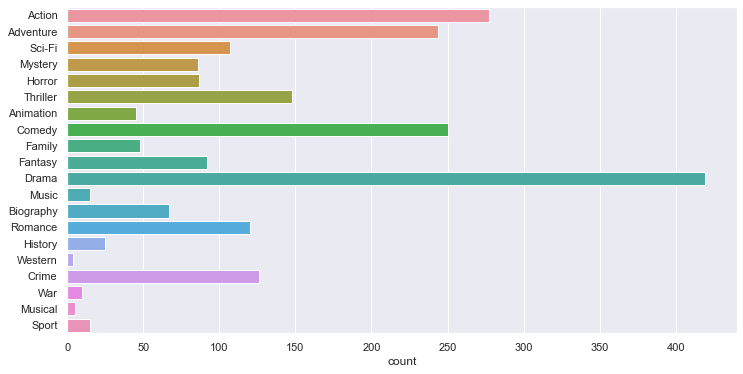

In [198]:
# Plotting the above
sns.set(rc={"figure.figsize":(12, 6)}) #width=3, #height=4
sns.countplot(y=one_d, data=imdb)

#### *The top three genres are - Drama, Action & Comedy, respectively.*